<a href="https://colab.research.google.com/github/realBagher/Tensorflow_sandbox/blob/main/classification/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
tf.__version__

'2.11.0'

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [7]:
type(fashion_mnist)

module

In [12]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [13]:
type(train_images)

numpy.ndarray

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
train_images.shape


(60000, 28, 28)

In [17]:
test_images.shape

(10000, 28, 28)

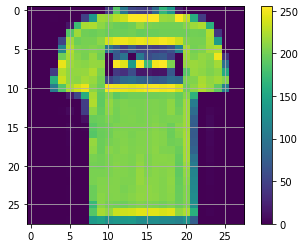

In [20]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

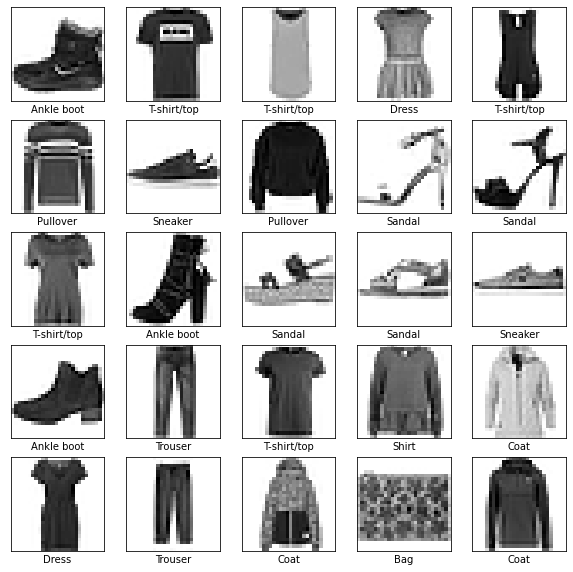

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5547 - accuracy: 0.8034
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4182 - accuracy: 0.8483
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3866 - accuracy: 0.8581
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8667
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3529 - accuracy: 0.8709
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3393 - accuracy: 0.8751
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3309 - accuracy: 0.8776
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3229 - accuracy: 0.8813
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.8841
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.311

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - loss: 0.3485 - accuracy: 0.8760 - 620ms/epoch - 2ms/step

Test accuracy: 0.8759999871253967

Test loss: 0.3484807312488556


In [38]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [40]:
predictions[0]

array([5.2719707e-07, 3.8154163e-12, 1.0406337e-10, 5.5853665e-11,
       9.7296046e-11, 2.6705945e-03, 2.7372700e-09, 2.5539862e-03,
       6.6283110e-07, 9.9477416e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

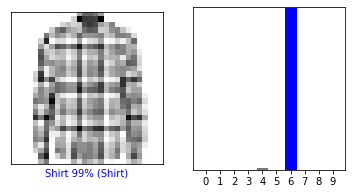

In [46]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

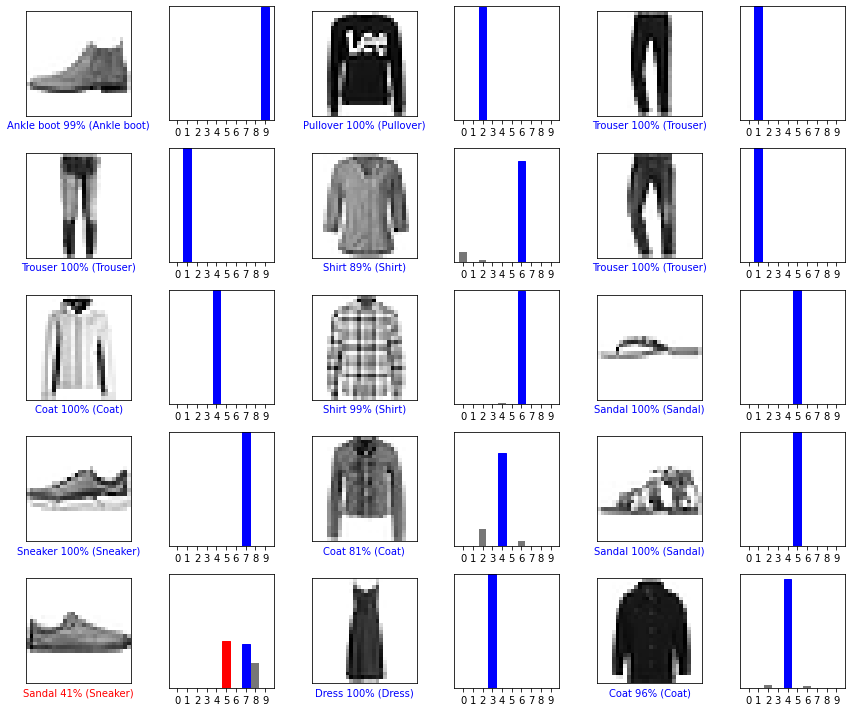

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()